In [1]:
import pandas as pd

In [2]:
#train_source_file = '/usr/src/tp2-1/data-in/210227_tp2_train_feng.csv'
#test_source_file = '/usr/src/tp2-1/data-in/210227_tp2_test_feng.csv'
#kaggle_predict_file =  '/usr/src/tp2-1/data-out/210228_XGBoost_CV_TimeSeriesSplit.csv'


feng_trainning_set = '/usr/src/tp2-1/data-in/210301_feng_Train_TP2_Datos_2020-2C.csv'
feng_eval_set = '/usr/src/tp2-1/data-in/210301_feng_Test_TP2_Datos_2020-2C.csv'

train_source_file = feng_trainning_set
test_source_file = feng_eval_set

kaggle_predict_file =  '/usr/src/tp2-1/data-out/2100301_XGBoost_CV_TimeSeriesSplit.csv'


In [3]:
df_train_feng = pd.read_csv(train_source_file)

In [4]:
df_train_feng.shape

(9791, 2866)

In [5]:
X = df_train_feng.drop(columns = 'Stage')
y = df_train_feng['Stage']

In [6]:
X.shape

(9791, 2865)

In [7]:
from sklearn.model_selection import TimeSeriesSplit, ParameterGrid
import numpy as np

import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV


In [8]:
xgbt_grid = {"learning_rate": [0.05, 0.1, 0.15], 
        'max_depth': [25, 30, 35], 
        'alpha': [24], 
        'n_estimators': [85, 90, 95]}

xgbt_paramGrid = ParameterGrid(xgbt_grid)

xgbt = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, eval_metric='logloss')    

In [9]:
tscv = TimeSeriesSplit(n_splits=5)

#LogLoss = make_scorer(log_loss, greater_is_better=False)

#scoring=LogLoss,\
gsearch = GridSearchCV(estimator=xgbt, cv=tscv, param_grid=xgbt_grid, \
                       verbose=3, return_train_score = True)


In [ ]:
gsearch.fit(X, y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END alpha=24, learning_rate=0.05, max_depth=25, n_estimators=85; total time=   4.2s
[CV 2/5] END alpha=24, learning_rate=0.05, max_depth=25, n_estimators=85; total time=  11.5s
[CV 3/5] END alpha=24, learning_rate=0.05, max_depth=25, n_estimators=85; total time=  15.0s
[CV 4/5] END alpha=24, learning_rate=0.05, max_depth=25, n_estimators=85; total time=  20.2s
[CV 5/5] END alpha=24, learning_rate=0.05, max_depth=25, n_estimators=85; total time=  28.3s
[CV 1/5] END alpha=24, learning_rate=0.05, max_depth=25, n_estimators=90; total time=   3.8s
[CV 2/5] END alpha=24, learning_rate=0.05, max_depth=25, n_estimators=90; total time=   9.5s
[CV 3/5] END alpha=24, learning_rate=0.05, max_depth=25, n_estimators=90; total time=  14.5s
[CV 4/5] END alpha=24, learning_rate=0.05, max_depth=25, n_estimators=90; total time=  19.9s
[CV 5/5] END alpha=24, learning_rate=0.05, max_depth=25, n_estimators=90; total time=  23.9s
[CV 1/5]

In [ ]:
print(gsearch.best_score_)
print(gsearch.best_params_)

'''
0.3829190278056018 > {'alpha': 24, 'learning_rate': 0.1, 'max_depth': 30, 'n_estimators': 90}
'''

In [49]:
'''
for train_index, val_index in splits.split(X):
    _X_train_ = X.iloc[train_index]
    _y_train_ = y.iloc[train_index]
    _X_val_ = X.iloc[val_index]
    _y_val_ = y.iloc[val_index]
    
    
    p_train = gsearch.predict(_X_train_)
    p_val = gsearch.predict(_X_val_)
    
    print(p_train)
    #score_train = np.mean(log_loss(_y_train_, p_train))
    #score_val = np.mean(log_loss(_y_val_, p_val))
#print(':::' + str()
#print(':::' + str()
score_train = np.mean(log_loss(_y_train_, p_train))
score_val = np.mean(log_loss(_y_val_, p_val))
'''

"\nfor train_index, val_index in splits.split(X):\n    _X_train_ = X.iloc[train_index]\n    _y_train_ = y.iloc[train_index]\n    _X_val_ = X.iloc[val_index]\n    _y_val_ = y.iloc[val_index]\n    \n    \n    p_train = gsearch.predict(_X_train_)\n    p_val = gsearch.predict(_X_val_)\n    \n    print(p_train)\n    #score_train = np.mean(log_loss(_y_train_, p_train))\n    #score_val = np.mean(log_loss(_y_val_, p_val))\n#print(':::' + str()\n#print(':::' + str()\nscore_train = np.mean(log_loss(_y_train_, p_train))\nscore_val = np.mean(log_loss(_y_val_, p_val))\n"

In [ ]:
gsearch

In [18]:
'''
rfr = RandomForestRegressor()

# Create a dictionary of hyperparameters to search
rfr_grid = {"n_estimators": [28, 29, 30, 31], 
        'max_depth': [20, 21, 22, 23, 24], 
        'max_features': [67, 68, 69, 70, 71, 72, 73, 80, 85], 
        'random_state': [123]}

rfr_paramGrid = ParameterGrid(rfr_grid)
'''

'\nrfr = RandomForestRegressor()\n\n# Create a dictionary of hyperparameters to search\nrfr_grid = {"n_estimators": [28, 29, 30, 31], \n        \'max_depth\': [20, 21, 22, 23, 24], \n        \'max_features\': [67, 68, 69, 70, 71, 72, 73, 80, 85], \n        \'random_state\': [123]}\n\nrfr_paramGrid = ParameterGrid(rfr_grid)\n'

In [50]:
'''
splits = TimeSeriesSplit(n_splits=5, max_train_size=365*2)

def TimeSplit_ModBuild(model, paramGrid, splits, X, y):

    #Loop over each time split and for each
    for train_index, val_index in splits.split(X):
        _X_train_ = X.iloc[train_index]
        _y_train_ = y.iloc[train_index]
        _X_val_ = X.iloc[val_index]
        _y_val_ = y.iloc[val_index]

        train_scores = []
        val_scores = []
        #models = []
        
        # Loop through the parameter grid, set the hyperparameters, and save the scores
        for g in paramGrid:
            
            print(g)
            
            

            model.set_params(**g)
            model.fit(_X_train_, _y_train_)
            p_train = model.predict(_X_train_)
            p_val = model.predict(_X_val_)
            
            #print(':::' + str()
            #print(':::' + str()
            score_train = np.mean(log_loss(_y_train_, p_train))
            score_val = np.mean(log_loss(_y_val_, p_val))
            #score_train = np.mean(mean_squared_error(_y_train_, p_train))
            #score_val = np.mean(mean_squared_error(_y_val_, p_val))
            
            train_scores.append(score_train)
            val_scores.append(score_val)
            #models.append(model)
            best_idx = np.argmin(val_scores)
            
        print("Best-Fold HyperParams:: ", paramGrid[best_idx])
        print("Best-Fold Train log_loss: ", train_scores[best_idx])
        print("Best-Fold Val log_loss: ",val_scores[best_idx])
        print("\n")
        
    #Return most recent model
    return train_scores, val_scores, best_idx


# CV_rfr_tup = TimeSplit_ModBuild(rfr, rfr_paramGrid, splits, X, y)
CV_rfr_tup = TimeSplit_ModBuild(xgbt, xgbt_paramGrid, splits, X, y)
'''

'\nsplits = TimeSeriesSplit(n_splits=5, max_train_size=365*2)\n\ndef TimeSplit_ModBuild(model, paramGrid, splits, X, y):\n\n    #Loop over each time split and for each\n    for train_index, val_index in splits.split(X):\n        _X_train_ = X.iloc[train_index]\n        _y_train_ = y.iloc[train_index]\n        _X_val_ = X.iloc[val_index]\n        _y_val_ = y.iloc[val_index]\n\n        train_scores = []\n        val_scores = []\n        #models = []\n        \n        # Loop through the parameter grid, set the hyperparameters, and save the scores\n        for g in paramGrid:\n            \n            print(g)\n            \n            \n\n            model.set_params(**g)\n            model.fit(_X_train_, _y_train_)\n            p_train = model.predict(_X_train_)\n            p_val = model.predict(_X_val_)\n            \n            #print(\':::\' + str()\n            #print(\':::\' + str()\n            score_train = np.mean(log_loss(_y_train_, p_train))\n            score_val = np.mea

In [51]:
df_frio_frio_test = pd.read_csv(test_source_file)

In [53]:
df_frio_frio_test

,Unnamed: 0,Opportunity_ID,Region_APAC,Region_Americas,Region_EMEA,Region_Japan,Region_Middle East,Territory_Albania,Territory_Armenia,Territory_Australia,...,Total_Amount_sum,Planned_Delivery_Date_diff,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Quote_Type,Delivery_Year,TRF
0,0,10689,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,367419.0,30.0,1.0,1.0,1.0,1.0,0.0,0.0,2019.0,0.0
1,1,10690,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,757783.5,27.4,1.0,1.0,1.0,1.0,0.0,0.0,2019.0,0.2
2,2,10691,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21037.5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2019.0,0.0
3,3,10692,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2169106.5,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2019.0,1.0
4,4,10693,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5752.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,1562,12364,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,147750.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,2019.0,0.0
1563,1563,12365,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45054.9,91.0,1.0,1.0,0.0,0.0,0.0,0.0,2019.0,0.0
1564,1564,12366,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100122.0,91.0,1.0,1.0,1.0,1.0,0.0,0.0,2019.0,0.0
1565,1565,12367,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,143220.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2019.0,0.0


In [63]:
#predicts = best_rfr.predict(df_frio_frio_test)
predicts = gsearch.predict(df_frio_frio_test)


In [64]:
predicts

array([0.5997573 , 0.5703797 , 0.85874844, ..., 0.31926543, 0.56196475,
       0.22847621], dtype=float32)

In [58]:
output = pd.DataFrame({'Opportunity_ID':df_frio_frio_test.Opportunity_ID, 'Target': predicts})


In [59]:
final=output.groupby('Opportunity_ID').mean()
final

,Target
Opportunity_ID,
10689,0.599757
10690,0.570380
10691,0.858748
10692,0.521195
10693,0.959178
...,...
12364,0.794151
12365,0.462796
12366,0.319265


In [60]:
output.to_csv(kaggle_predict_file, index=False)

In [53]:
'''
    de aqui en adelante eran pruebas para ver si puedo determinar que features tiene mayor
    peso para mejorar el feng
'''

'\n    de aqui en adelante eran pruebas para ver si puedo determinar que features tiene mayor\n    peso para mejorar el feng\n'

In [54]:
import matplotlib.pyplot as plt

In [55]:
rfr.feature_importances_

array([0.01906076, 0.02379769, 0.00168856, ..., 0.00053891, 0.00372354,
       0.03004665])

In [56]:
rfr_series = pd.Series(rfr.feature_importances_)

In [57]:
X_series = pd.Series(X.columns)

In [58]:
Comb = pd.concat([X_series, rfr_series], axis=1)
type(Comb)

pandas.core.frame.DataFrame

In [59]:
Comb.nlargest(20, 1)[0]

2856                   Total_Amount
1984        Product_Category_B_None
2066                  Currency_None
1970              Product_Type_None
2063                     Price_None
1985       Product_Category_B_Other
2866                            TRF
2858     Planned_Delivery_Date_diff
1968                     Brand_None
1                    Opportunity_ID
2857               Total_Amount_sum
2855                ASP_(converted)
2844            Delivery_Quarter_Q2
0                        Unnamed: 0
2854                            ASP
2830                 Month_2018 - 6
2064                    Price_Other
1903    Account_Type_Account_Type_0
1977                      Size_None
2067                   Currency_USD
Name: 0, dtype: object

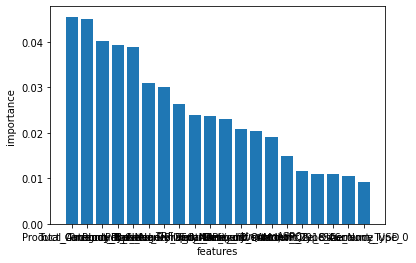

In [60]:
plt.bar(Comb.nlargest(20, 1)[0], Comb.nlargest(20, 1)[1])
plt.xlabel('features')
plt.ylabel('importance ')
plt.show()

In [27]:
X_train = pd.DataFrame(columns=['mascota', 'edad', 'sexo', 'estado'], data=[
['perro',50,'M','feliz'],
['gato',5,'M','feliz'],
['perro',80,'M','trsite'],
['gato',80,'M','feliz'],
['perro',25,'M','feliz']
])

In [28]:
import pandas as pd

In [29]:
X_train

,mascota,edad,sexo,estado
0,perro,50,M,feliz
1,gato,5,M,feliz
2,perro,80,M,trsite
3,gato,80,M,feliz
4,perro,25,M,feliz
